## Problem 1: Function Graphs

a.)

Write a function `polynomialGraph(N,f)` which does the following:
- Takes as input an integer $N$ and a univariate polynomial $f$ with integer coefficients.
- Creates and returns a *looped* directed graph $G$ with 
    - vertices given by the integers $0,1,\dots,N-1$.
    - an edge from $i$ to $j$ if and only if $f(i) \equiv j \mod N$.
    
A looped graph is a graph which allows an edge from a vertex to itself. I have shown an example below; note the syntax `G.allow_loops(True)`, which allows the graph to contain loops:

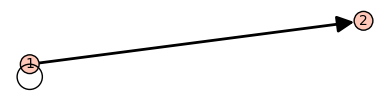

In [1]:
G = DiGraph()
G.allow_loops(True)
G.add_vertices([1,2])
G.add_edges([(1,1),(1,2)])
show(G)

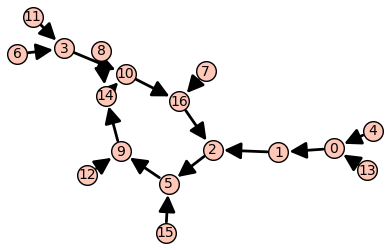

In [3]:
def polynomialGraph(N,f):
    G = DiGraph()
    G.allow_loops(True)
    G.add_vertices(list(range(N)))
    G.add_edges([(i,j) for i in G.vertices() for j in G.vertices() if int(f(i)) % N == j])
    return G

var('x')
f(x) = x^2 + 1
show(polynomialGraph(17, f))

b.)

In the code cell below I have defined three quadratic polynomials:

In [4]:
var('x')
f(x) = x^2 + 1
g(x) = x^2
h(x) = x^2 - 1

For each such polynomial `poly`, iterate through the integers $N = 2, 3, \dots, 200$ and collect data on the number of connected components in your graph `polynomialGraph(N, poly)`. Then plot *three separate histograms* (one for each polynomial) plotting the data you have collected for each polynomial. 

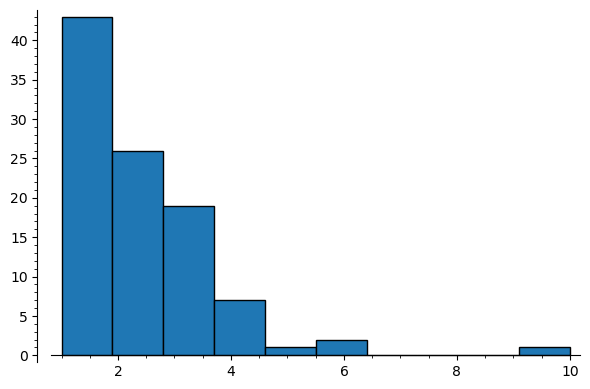

In [6]:
histogram([polynomialGraph(N,f).connected_components_number() for N in range(2,101)])

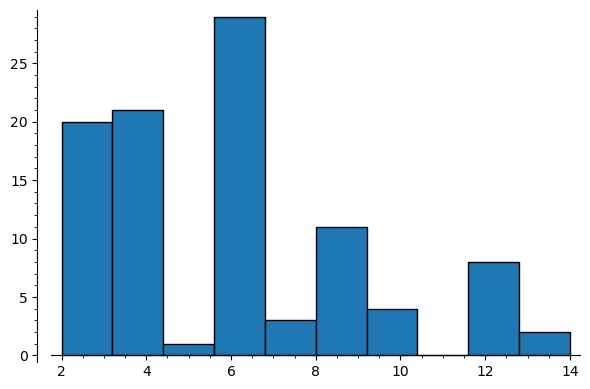

In [7]:
histogram([polynomialGraph(N,g).connected_components_number() for N in range(2,101)])

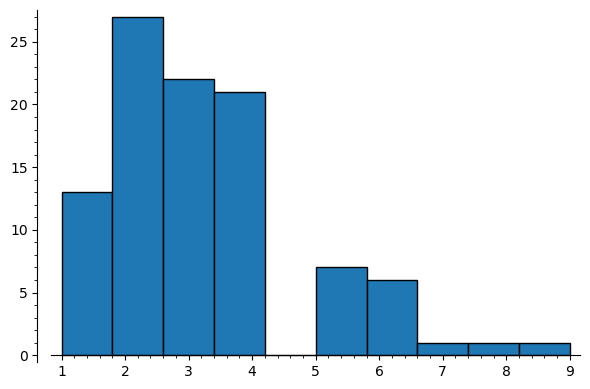

In [9]:
histogram([polynomialGraph(N,h).connected_components_number() for N in range(2,101)])

c.) 

In the code cell below I have wrote a function which creates a similar graph, but the polynomial $f$ has been replaced with a *random function*. Analogously to part b.), call `randomFunctionGraph(N)` for $N = 2,3,\dots, 100$ and keep track of the number of connected components. Then plot the corresponding histogram. In the markdown cell below, answer: which of the polynomials $f, g, h$ is behaving "most randomly," as measured by their histograms?

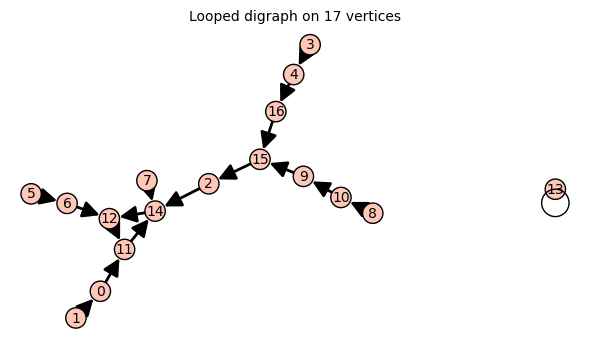

In [8]:
import random
def randomFunctionGraph(N):
    G = DiGraph()
    G.allow_loops(True)
    G.add_vertices([i for i in range(N)])
    for i in G:
        G.add_edge((i, random.randint(0,N-1)))
    return(G)

randomFunctionGraph(17)

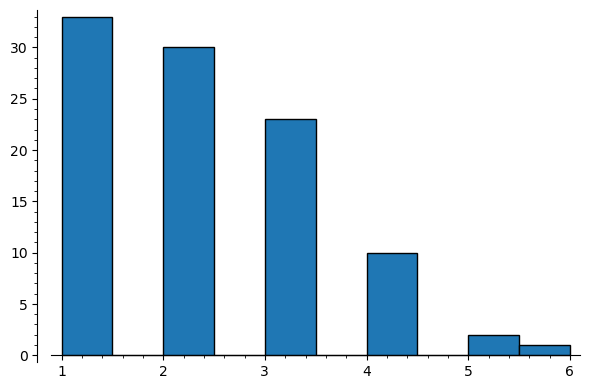

In [13]:
histogram([randomFunctionGraph(N).connected_components_number() for N in range(2,101)])

The graph of g is behaving the most randomly. 

This question is related to *Pollard's rho algorithm* for factoring numbers. See here: https://en.wikipedia.org/wiki/Pollard%27s_rho_algorithm if you are interested. 

## Problem 2: Sophie Germain Primes

A *Sophie Germain prime* is a prime number $p$ such that $2p+1$ is also prime. They are named after the French mathematician Sophie Germain: https://en.wikipedia.org/wiki/Sophie_Germain , who was interested in them as a result of her interest in the famous *Fermat's Last Theorem*. Nowadays they are of interest as they have applications to cryptography.

a.) Write a function `germain(N)` which takes as input a positive integer $N$ and returns a list of the Sophie Germain primes which are less than or equal to $N$.

In [15]:
def germain(N):
    return[p for p in range(2, N + 1) if is_prime(p) and is_prime(2*p+1)]

germain(100)

[2, 3, 5, 11, 23, 29, 41, 53, 83, 89]

b.) 

The *PrimeGrid* project is a collaborative, distributed computing project which aims to find large numbers of a given type: https://en.wikipedia.org/wiki/PrimeGrid. Take a look at their Wikipedia page, and then in the Markdown cell below:
- Write down the largest Sophie Germain prime that PrimeGrid has found. How many digits are in this number? (you can use Sage's .ndigits() function if needed)
- Give a short (one line) description of another project that PrimeGrid is working on.

In [16]:
#Sage code if needed
#The largest Sophie Germain prime found by Prime Finder so far is 2618163402417 * 2^1290000 - 1
G = 2618163402417 * 2^1290000 - 1
print(G.ndigits())

388342


PrimeGrid is also looking for Cullen primes, one of which is the 14th biggest prime in history, and the second is PrimeGrid's largest prime which is 6679881 * 2^(6679881) + 1. A Cullen prime is a prime of the sequence C = n * 2^n + 1

c.) 

A *Cunningham chain* is a sequence of prime numbers of the form $p, 2p+1, 2(2p+1)+1, 2(2(2p+1)+1)+1,\dots$ I.e. each number is a prime number and, to get from one number to the next, you multiply by $2$ and add $1$. Any Sophie Germain prime $p$ gives rise to a Cunningham chain of two numbers, tautologically.

Cunningham chains are currently of interest in relation to the ElGamal cryptosystem, and also Bitcoin.

Write a function `cunningham(n)` which 
- takes as input a positive integer n
- if n *is not prime*, returns 0
- if n *is prime*, returns the length of the longest Cunningham chain which starts at n.

For example:
- cunningham(8) = 0
- cunningham(7) = 1, since 7 is prime but 2*7+1 = 15 is not.
- cunningham(2) = 5, since 2, 5, 11, 23, and 47 are prime, but 95 is not.

In [17]:
def cunningham(n):
    length = 0
    while is_prime(n):
        n = 2*n + 1
        length += 1
    return length
    
for n in [8,7,2]:
    print(cunningham(n))

0
1
5


d.)

What is the longest Cunningham which starts at a number $n\leq 10000$?

In [18]:
longest = max([cunningham(n) for n in range(10001)])
show(longest)

6

It is conjectured that there are Cunningham chains of arbitrary length (although it is impossible for a single Cunningham chain to extend infinitely).

## Problem 3: Quadratic Residues

A *quadratic residue* mod $N$ is a residue class which can be written as a square mod $N$, i.e. $a$ is a quadratic residue mod $N$ if there exists $x$ with $x^2\equiv a\mod N$. You can access them in Sage like so:

In [19]:
quadratic_residues(23)

[0, 1, 2, 3, 4, 6, 8, 9, 12, 13, 16, 18]

a.)

Write a function `quad2(n)` which takes as input a positive integer $n$ and returns 
- True if 2 is a quadratic residue mod $n$
- False otherwise

In [4]:
def quad2(n):
    if 2 in quadratic_residues(n):
        return True
    else:
        return False


print(quad2(7))
print(quad2(11))

True
False


b.) Compute the ratio
$$
\frac{\#\{p:p\text{ prime }, p < 10000, 2\text{ is a quadratic residue mod } p\}}{\#\{p:p\text{ prime }, p < 10000\}}
$$

In [5]:
num = [p for p in range(10000) if is_prime(p) and quad2(p) == True]
den = [p for p in range(10000) if is_prime(p)]
print(float((len(num)/len(den))))

0.4906427990235964


c.) Compute the ratio
$$
\frac{\#\{p:p\text{ prime }, p < 10000, p\equiv 1 \mod 8 \text{ or }p\equiv 7\mod 8, \text{ and } 2\text{ is a quadratic residue mod } p\}}{\#\{p:p\text{ prime }, p < 10000, p\equiv 1 \mod 8 \text{ or }p\equiv 7\mod 8\}}
$$

In [7]:
num = [p for p in range(10000) if is_prime(p) and (p%8 == 1 or p%8 == 7) and quad2(p) == True]
den = [p for p in range(10000) if is_prime(p) and (p%8 == 1 or p%8 == 7)]
print(float((len(num)/len(den))))

1.0


d.) Compute the ratio
$$
\frac{\#\{p:p\text{ prime }, p < 10000, p\equiv 3 \mod 8 \text{ or }p\equiv 5\mod 8, \text{ and } 2\text{ is a quadratic residue mod } p\}}{\#\{p:p\text{ prime }, p < 10000, p\equiv 3 \mod 8 \text{ or }p\equiv 5\mod 8\}}
$$

In [8]:
num = [p for p in range(10000) if is_prime(p) and (p%8 == 3 or p%8 == 5) and quad2(p) == True]
den = [p for p in range(10000) if is_prime(p) and (p%8 == 3 or p%8 == 5)]
print(float((len(num)/len(den))))

0.0


What you are seeing is a combination of *Quadratic Reciprocity* and the *Cebotarev Density Theorem* (there are no other possibilities for what $p$ could be mod $8$, except for the prime $p = 2$, which is just an exception).

## Problem 4: Artin's Conjecture on Primitive Roots

a.)

Define a *primitive root* mod $p$, where $p$ is a prime number.

x is a primitive root mod p if for all k >= 0, x^k yields all non-zero remainder 1,2,3,4,...p-1mod(p).

b.) 

Take a quick look at *Artin's Conjecture on primitive roots* here: https://en.wikipedia.org/wiki/Artin%27s_conjecture_on_primitive_roots

Numerically compute Artin's constant accurately to at least $5$ decimal places using the formula that is in the Wikipedia page (don't just copy in the numeric value).

In [18]:
def artin_constant(n):
    return float(prod([1 - (1/(p*(p-1))) for p in range(n) if is_prime(p) == True]))
artin_constant(1000000)

0.37395583896433005

c.) 

Write a function `artin(N)` which takes in a positive integer $N$ and outputs the ratio
$$
\frac{\#\{p: p\leq N, p\text{ prime and }2\text{ is a primitive root mod }p\}}
{\#\{p: p\leq N, p\text{ prime }\}}
$$

In [23]:
def artin(N):
    num = [p for p in range(N+1) if is_prime(p) == True and primitive_root(p) == 2]
    den = [p for p in range(N+1) if is_prime(p) == True]
    return float(len(num)/len(den))

artin(1000)

0.39880952380952384

d.)

Let $c$ be the constant you computed in part b.). For $n$ in $[10,50,100,500,1000,5000,10000,50000,100000]$, compute `artin(n)/c`. Display a listplot of the values `(log(n),artin(n)/c)` for $n$ in this range.

1.3370562721650476
1.2479191873540445
1.2835740212784457
1.0696450177320382
1.0664615504173596
1.0192805662244757
1.0226467826160657
1.0018153950412572


1.0044649183925494


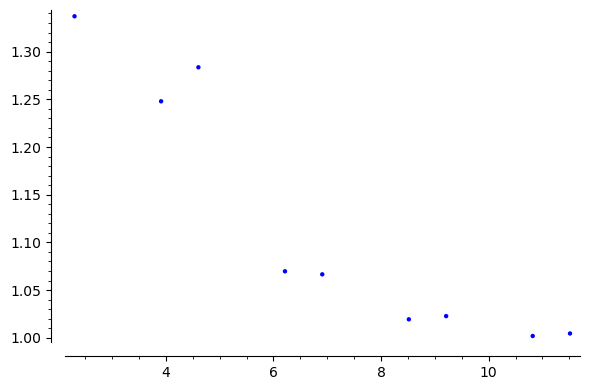

In [26]:
c = artin_constant(1000000)
nrange = [10,50,100,500,1000,5000,10000,50000,100000]
for n in nrange:
    print(artin(n)/c)

list_plot([(log(n), artin(n)/c) for n in nrange])

## Problem 5: Selfridge's Conjecture

Let $N$ be an odd number. A conjecture of John Selfridge: https://en.wikipedia.org/wiki/John_Selfridge states that if 
- $N \equiv 2 \mod 5 \text{ or } N \equiv 4 \mod 5$
- $2^{N-1}\equiv 1\mod N$
- $f_{N} \equiv 0\mod N$

then $N$ is prime. Here $f_N$ is the $N$th Fibonacci number; recall that in this class we are using the indexing 
$$
f_0 = f_1 = 1, \;\;f_{N}=f_{N-1}+f_{N-2} \;\;N\geq 2
$$
but that this may differ from indexing used in other sources.

There are no known counterexamples to this claim. Selfridge and two of his collaborators, Carl Pomerance and Samuel Wagstaff, have offered \$620 to anyone able to produce a counterexample.

a.) 

Write a function `selfridge` which takes as input a positive integer $N$ and returns a tuple $(a,b,c)$ with 
- a given by the residue of $N \mod 5$
- b given by the residue of $2^{N-1} \mod N$
- c given by the residue of $f_{N} \mod N$.

You are welcome to use your Fibonacci function from Homework 1, although it is much more efficient to slightly modify it so that it always works mod $N$ instead of simply computing the Fibonacci number as an integer (similar to how modular exponentiation is much more efficient than computing the exponentiation as an integer and then reducing)

In [32]:
def fib2(N):
    counter = 2
    a = 0
    b = 1
    if N <= 1:
        return N
    else:
        while counter <= N:
            c = a + b
            a = b
            b = c
            counter += 1
        return c

def selfridge(N):
    return (mod(N, 5), mod(2^(N-1), N), mod(fib2(N), N))
    
selfridge(323)

(3, 157, 1)

b.) 

A number $N$ for which $f_N \equiv 0\mod N$ but with $N$ *not prime* is called a *Fibonacci pseudoprime*. Print the number of Fibonacci pseudoprimes which are less than or equal to $100000$.

In [44]:
def fib_psuedo_primo(N):
    a = 1
    b = 1
    counter = 2
    for i in range(2, N+1):
        a,b = b, a+b
        if b%i == 0 and not is_prime(i):
            counter += 1
    return counter
print(fib_psuedo_primo(10000))

37


c.) 

Prove that there are no counterexamples to Selfridge's conjecture with $N\leq 100000$.

In [46]:
def selfridge_proof(N):
    counter = 0
    a,b = 1,1
    for i in range(2,N+1):
        a,b = b, a+b
        if mod(i,5) in [2,4] and mod(2^(i-1), i) == 1 and b%i == 0 and not is_prime(i):
            counter += 1
    return counter

print(selfridge_proof(10000))

0
